# Absenteeism at Work

This project conducts exploratory analysis on employee records from a courier company in Brazil and aims to predict absenteeism in hours, assuming this is a linear regression problem.

### Toolkit 

In [2]:
#Dependencies

# TO CLEAN DATA
import pandas as pd
import numpy as np

# TO VISUALIZE DATA
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# TO PREDICT DATA
from sklearn.metrics import confusion_matrix

## About our data

This dataset is available from the UCI Machine Learning Repository. Records are dated from July 2007 to July 2010. <br>

36 employees, 5124 rows of incidents and 21 columns of information on hours of absence, reason for absence, date of absence, and etc.

See [documentation](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) for full list of attributes. 

In [7]:
# load dataset through pandas
emp_data=pd.read_excel('../Dataset_UCI_Machine_Learning_Project/Absenteeism_at_work.xls')

In [8]:
emp_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


# Clean Data

In [14]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    emp_data[i] = emp_data[i].astype("category")

for i in numerical_set :
    emp_data[i] = emp_data[i].astype("float64")  

Delete the employees that have 0 as in "Absenteeism time in hours" since this will not help the predictions.  3 employees excist that have not missed any work. 

In [15]:
## In our data set if the below features has 0 as the value ,since it is  practically not  an acceptable value, we will replace it with NA
for i in ["Reason for absence","Month of absence","Day of the week","Seasons","Education","ID","Age","Weight","Height","Body mass index", "Absenteeism time in hours" ]:
        emp_data[i] = emp_data[i].replace(0,np.nan)

clean_data=emp_data.dropna(how="any")
clean_data.head()

#Missing values
#missing_data = pd.DataFrame(emp_data.isnull().sum())
#missing_data = missing_data.rename(columns={0:"NA_sum"})
#missing_data["NA_percent"] = (missing_data["NA_sum"]/len(emp_data))*100
#missing_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26,7,3,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,4.0
2,3.0,23,7,4,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,2.0
3,7.0,7,7,5,1,279.0,5.0,14.0,39.0,239554.0,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,4.0
4,11.0,23,7,5,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,2.0
5,3.0,23,7,6,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,2.0


### Delete redundant data
Since BMI is a function of "Weight" we will drop the feature "Weight"

In [16]:
#We can delete the weight as we already know the BMI
modified_data=clean_data.drop("Weight", axis=1)

In [17]:
#Rename the numerical set
numerical_set = ["Transportation expense","Distance from Residence to Work","Service time","Age",
                 "Work load Average/day ","Hit target","Height","Body mass index","Absenteeism time in hours"]

# Explore data
### Lets get to know the employees
1. 85% have high school level education. The remaining 15% have graduate, postgraduate and/or doctorate education.
2. 68% of employees have 1, 2, 3 or 4 kids.
3. 63% of employees are social drinkers.
4. 93% of employees are social smokers.
5. 61% of employees don't have pets. 24% have one pet

### The average employee

1. Lives 29 kilometers from work
2. Has service time of 12. (Dataset is unclear about the unit of measurement)
3. Is 36.25 years old
4. Has 1 son
5. Has .78 pets
6. Missed 7.36 of work over the 4 year period

In [58]:
### Absenteeism and Age

clean_data.groupby(by = ['Age']).mean().sort_values('Absenteeism time in hours')

,ID,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Age,,,,,,,,,,,,
47.0,33.000000,248.000000,25.000000,14.000000,263517.782609,95.086957,2.000000,1.000000,86.000000,165.000000,32.000000,3.173913
49.0,32.000000,289.000000,48.000000,29.000000,309128.200000,92.600000,0.000000,2.000000,108.000000,172.000000,36.000000,3.200000
27.0,27.000000,184.000000,42.000000,7.000000,301190.142857,95.142857,0.000000,0.000000,58.000000,167.000000,21.000000,3.857143
32.0,24.000000,244.333333,21.666667,8.666667,258112.083333,95.250000,0.000000,0.000000,73.333333,176.500000,24.666667,4.000000
38.0,3.000000,179.000000,51.000000,18.000000,262248.437500,95.071429,0.000000,0.000000,89.000000,170.000000,31.000000,4.303571
29.0,30.000000,157.000000,27.000000,6.000000,263090.666667,94.666667,0.000000,0.000000,75.000000,185.000000,22.000000,5.166667
30.0,22.000000,179.000000,26.000000,9.000000,266221.565217,94.934783,0.000000,0.000000,56.000000,171.000000,19.000000,5.500000
28.0,22.938053,266.893805,30.283186,7.106195,274071.831858,95.000000,0.876106,2.176991,73.194690,171.247788,24.761062,5.761062
37.0,24.447368,151.868421,10.289474,11.157895,268077.618421,94.736842,0.289474,0.289474,84.447368,172.000000,28.289474,6.118421


### Top 3 Reasons for Absence

* Diseases of the musculoskeletal system and connective tissue
* Injury, poisoning and certain other consequences of external causes
* Medical consultation 
* Dental consultation 
* Diseases of the digestive system

### Most Popular Months of Absence

* March (765 cases)
* July (734 cases)
* April (482)

### Least Popular Months of Absence

* January (222 cases)
* August (288 cases)
* September (292 cases)

### Most Popular Day of Absence
* Monday

### Least Popular Day of Absence
* Thursday

In [61]:

# clean_data.groupby(by = ['Reason for absence']).sum().sort_values('Absenteeism time in hours')

In [62]:
# clean_data.describe()

### Getting ready for ML

C:\Users\Laura Sun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


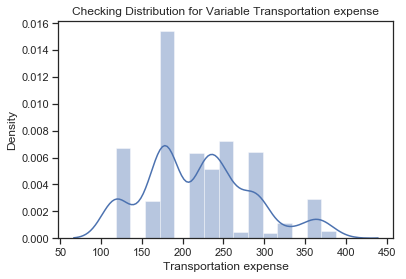

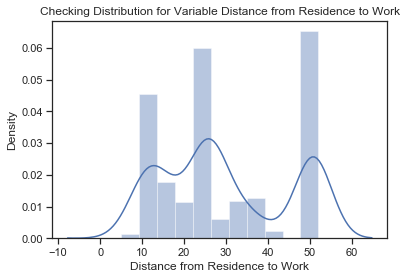

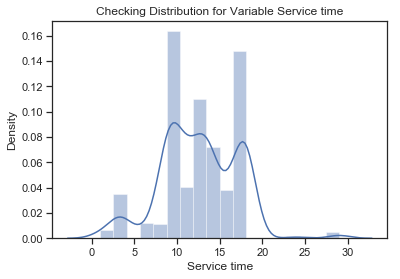

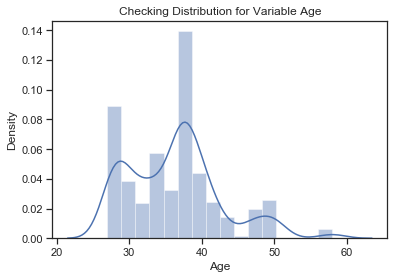

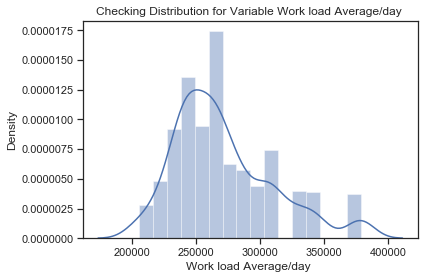

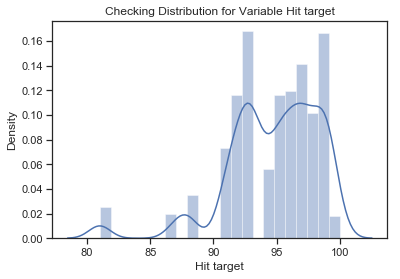

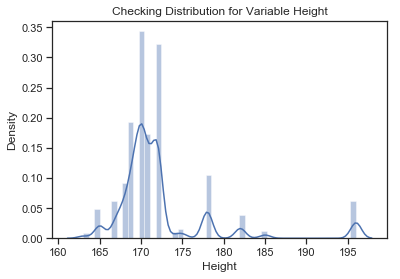

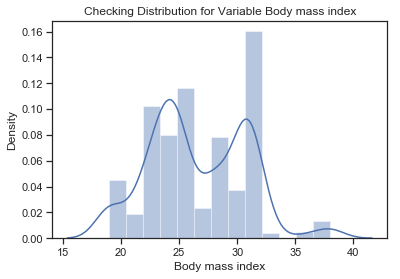

In [18]:
#Normality check
for i in numerical_set:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(modified_data[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

### Outlier Analysis

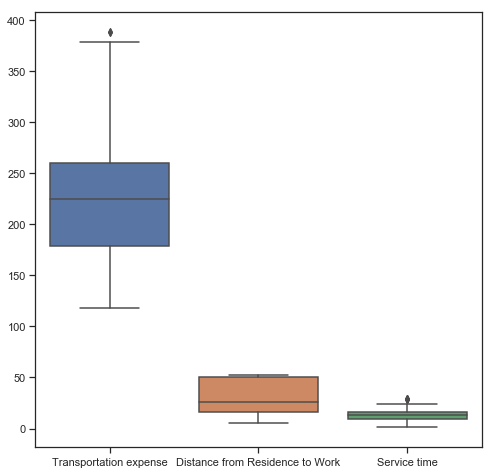

In [10]:
#Check for outliers in data using boxplot
sns.boxplot(data=modified_data[["Transportation expense","Distance from Residence to Work","Service time"]])
fig=plt.gcf()
fig.set_size_inches(8,8)

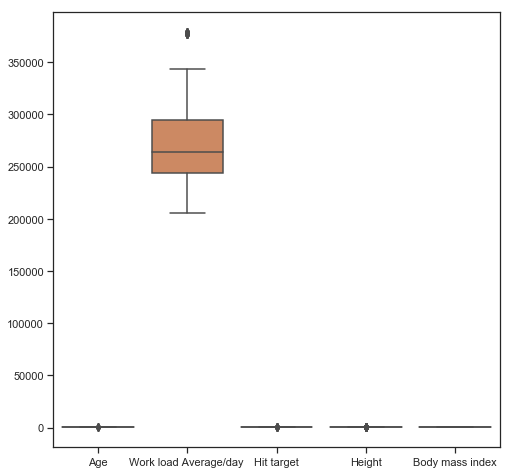

In [9]:
#Check for outliers in data using boxplot
sns.boxplot(data=modified_data[["Age","Work load Average/day ","Hit target","Height","Body mass index"]])
fig=plt.gcf()
fig.set_size_inches(8,8)

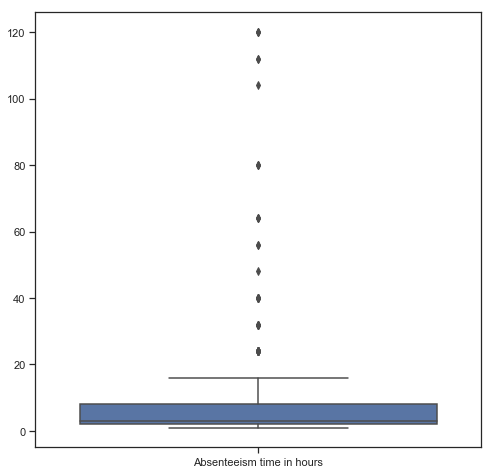

In [23]:
#Check for outliers in data using boxplot
sns.boxplot(data=modified_data[["Absenteeism time in hours"]])
fig=plt.gcf()
fig.set_size_inches(8,8)

We're looking to predict Absenteeism in hours, which has a lot a outliers.

C:\Users\Laura Sun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Laura Sun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Laura Sun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


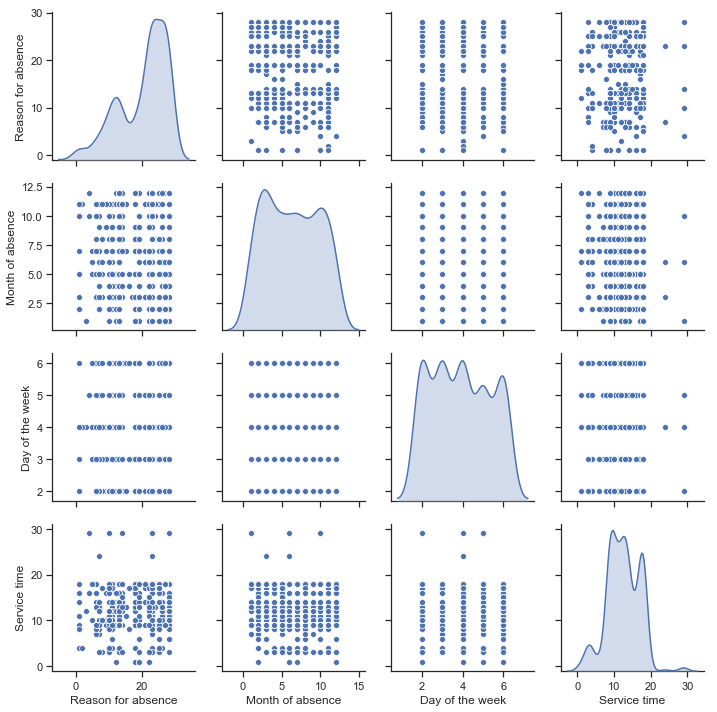

In [19]:
# Visualize data
sns.pairplot(emp_data[["Reason for absence", "Month of absence", "Day of the week", "Service time"]], diag_kind="kde")

C:\Users\Laura Sun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


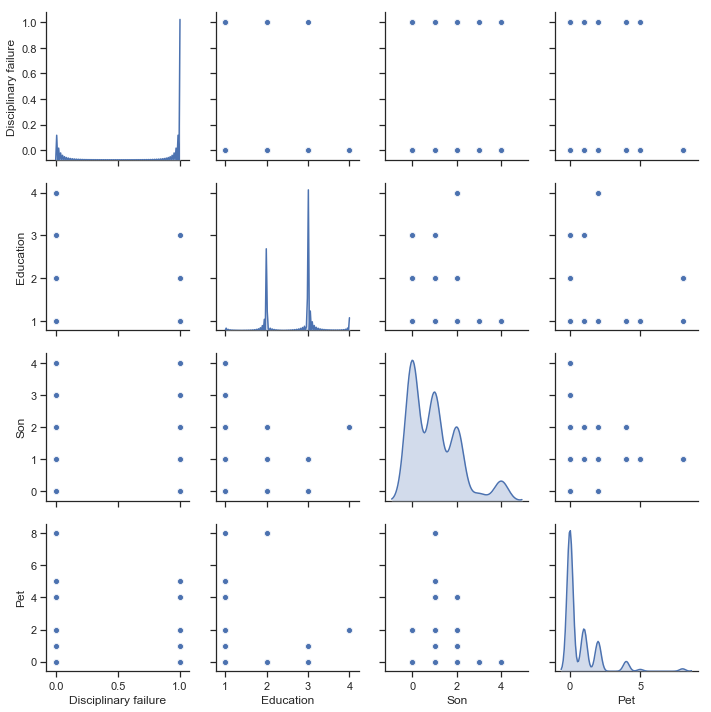

In [21]:
# Visualize data
sns.pairplot(emp_data[["Disciplinary failure", "Education", "Son", "Pet"]], diag_kind="kde")

C:\Users\Laura Sun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


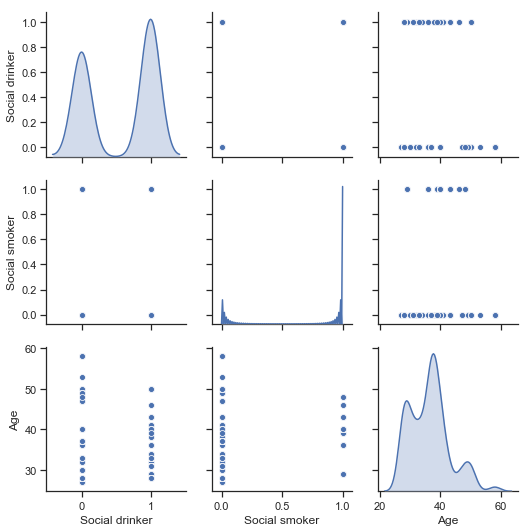

In [22]:
# Visualize data
sns.pairplot(emp_data[["Social drinker", "Social smoker", "Age"]], diag_kind="kde")